In [39]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

Text(0.5, 1.0, 'Original')

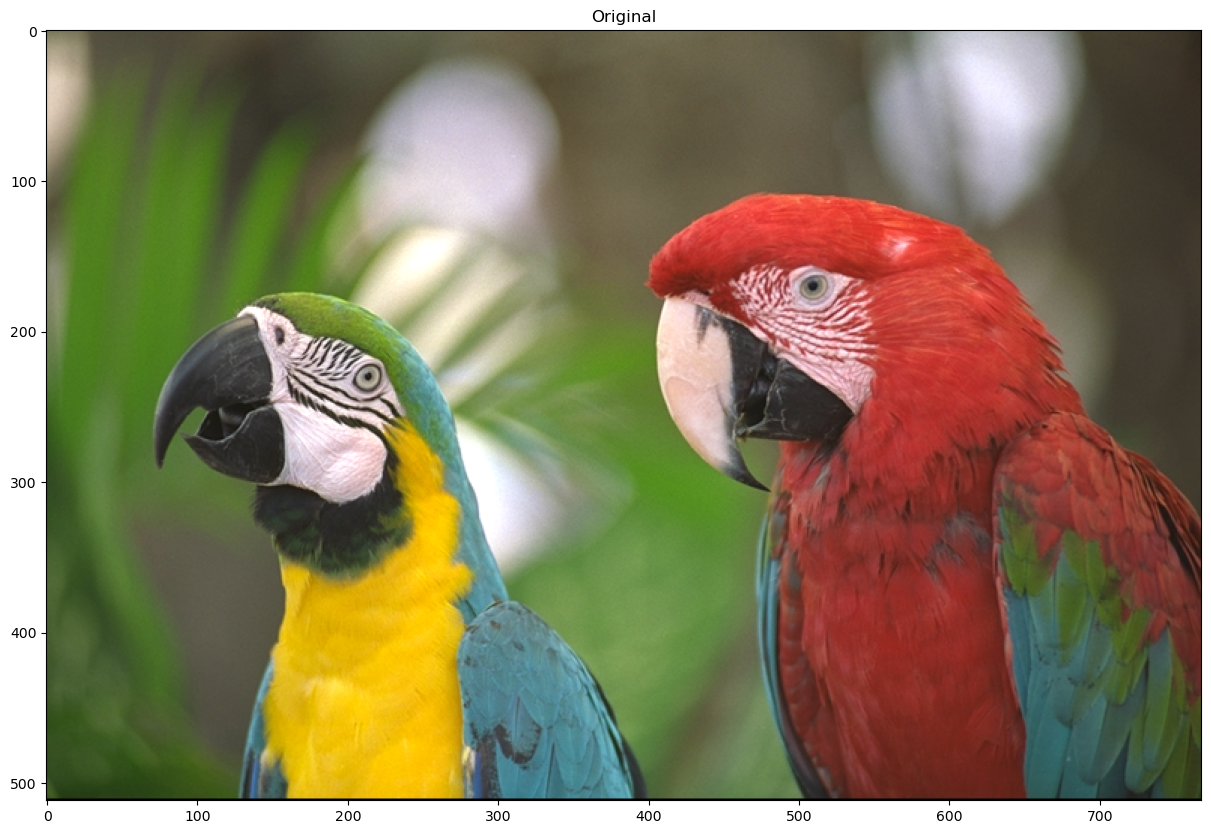

In [40]:
# Load image
img = cv2.imread('kodim23.png')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot it
plt.imshow(img)
plt.title('Original')

In [41]:
# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])

In [42]:
# Cast the image to float
img = img.astype(float)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]

        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        distances = np.sum((colors - pixel) ** 2, axis=1)
        closest_index = np.argmin(distances)
        new_pixel = colors[closest_index]
        
        # Apply quantization
        quantized[r, c, :] = new_pixel

Text(0.5, 1.0, 'Optimally quantized')

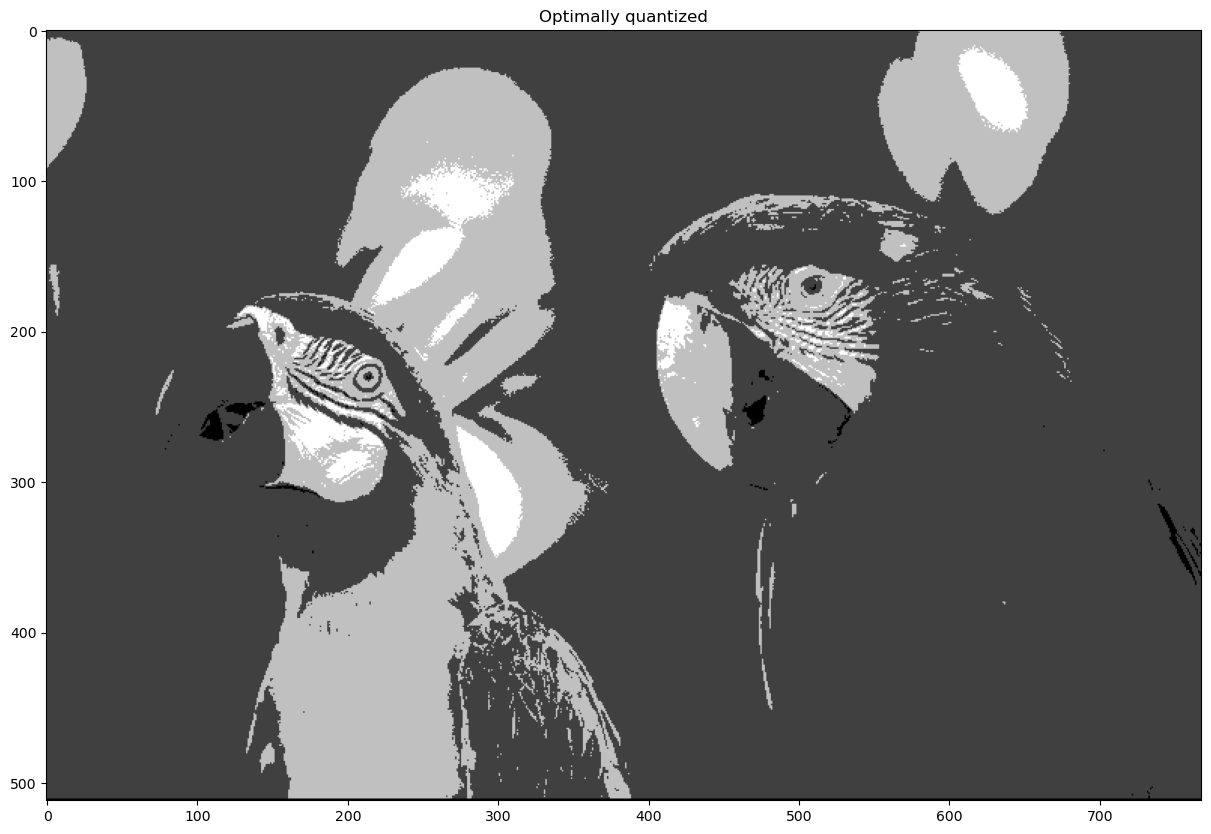

In [9]:
#Show quantized image (don't forget to cast back to uint8)
quantized = quantized.astype(np.uint8)
plt.imshow(quantized)
plt.title('Optimally quantized')

In [43]:
# Compute average quantization error
quant_error = np.abs(img - quantized)
avg_quant_error = np.mean(quant_error)

In [44]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)
img_tmp = img_tmp.astype(float)
dithering = dithering.astype(float)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img[r, c, :]

        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        distances = np.sum((colors - pixel) ** 2, axis=1)
        closest_index = np.argmin(distances)
        new_pixel = colors[closest_index]

        # Compute quantization error
        quant_error = pixel - quantized[r, c, :]

        # Diffuse the quantization error according to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r, c+1, :] += quant_error * 7 / 16  # Diffuse to the pixel on the right
        img_tmp[r+1, c-1, :] += quant_error * 3 / 16  # Diffuse to the pixel on the bottom-left
        img_tmp[r+1, c, :] += quant_error * 5 / 16  # Diffuse to the pixel below
        img_tmp[r+1, c+1, :] += quant_error * 1 / 16 # Diffuse to the pixel on the bottom-right

        # Apply dithering
        dithering[r, c, :] = new_pixel

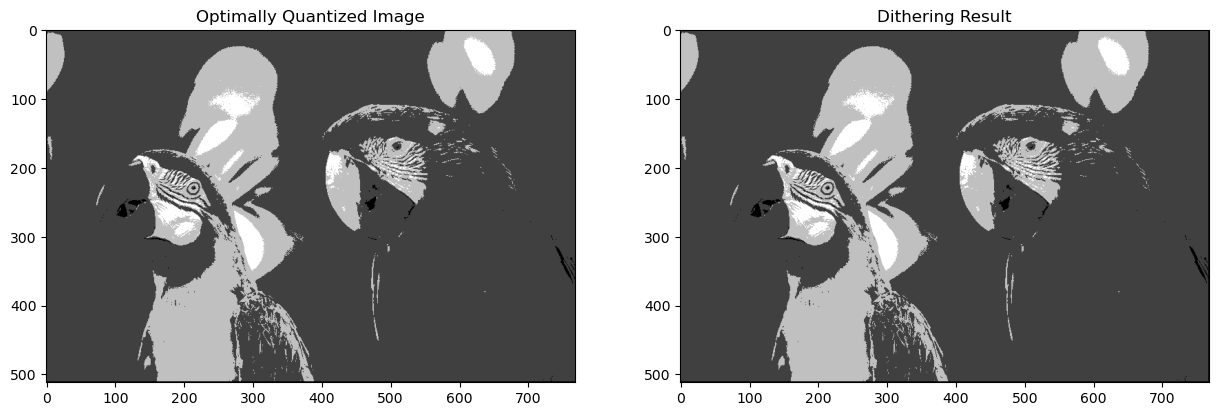

In [45]:
# Show quantized image (optimally quantized)
plt.subplot(121)
plt.imshow(quantized.astype(np.uint8))  # Convert to uint8 for display
plt.title('Optimally Quantized Image')

# Show dithering result
plt.subplot(122)
plt.imshow(dithering.astype(np.uint8))  # Convert to uint8 for display
plt.title('Dithering Result')

plt.show()

In [46]:
# Compute average quantization error for dithered image
dithering_error = np.abs(img_tmp - dithering)
avg_dith_error = np.mean(dithering_error)

In [47]:
# Black, white
colors = np.array([[0, 0, 0],
                  [255, 255, 255]])

In [50]:
# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]

        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        distances = np.sum((colors - pixel) ** 2, axis=1)
        closest_index = np.argmin(distances)
        new_pixel = colors[closest_index]
        
        # Apply quantization
        quantized[r, c, :] = new_pixel

Text(0.5, 1.0, 'Optimally quantized for black&white')

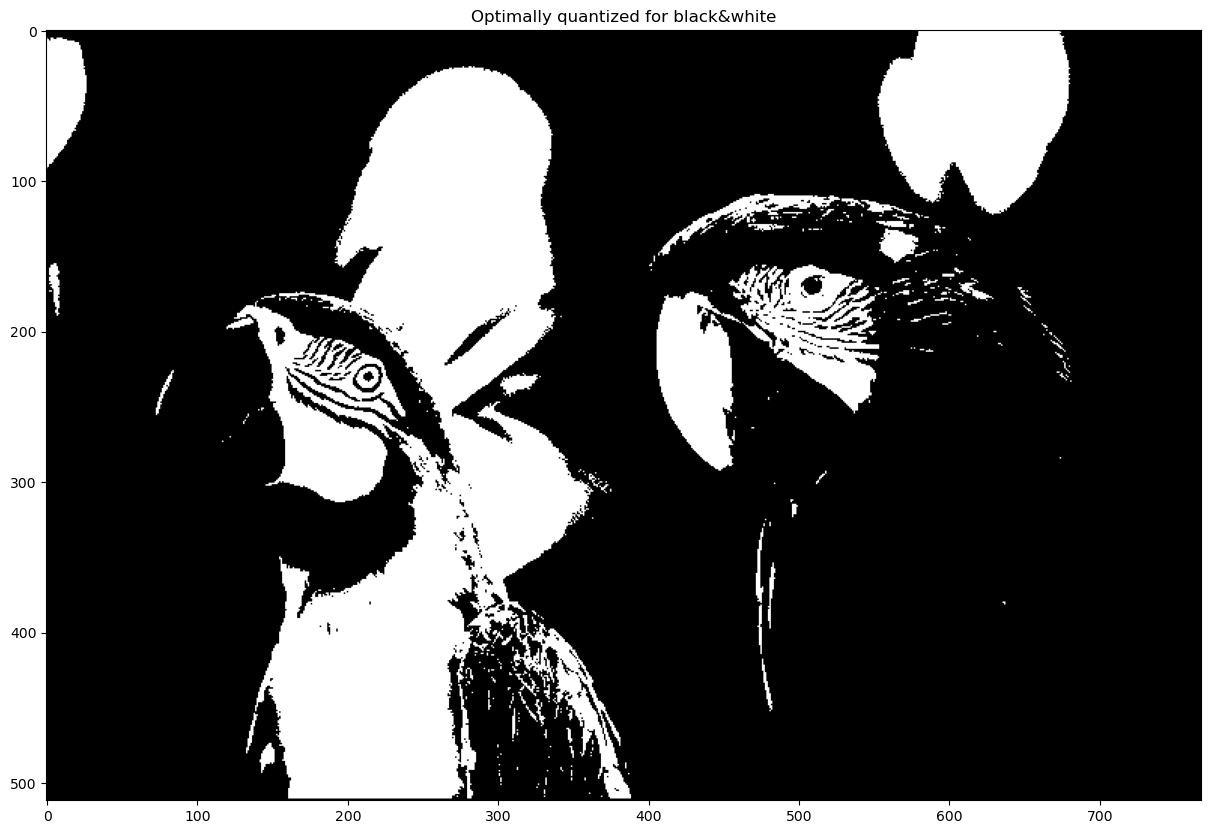

In [51]:
#Show quantized image (don't forget to cast back to uint8)
quantized = quantized.astype(np.uint8)
plt.imshow(quantized)
plt.title('Optimally quantized for black&white')

In [52]:
# Compute average quantization error
quant_error = np.abs(img - quantized)
avg_quant_error = np.mean(quant_error)

In [53]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)
img_tmp = img_tmp.astype(float)
dithering = dithering.astype(float)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img[r, c, :]

        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        distances = np.sum((colors - pixel) ** 2, axis=1)
        closest_index = np.argmin(distances)
        new_pixel = colors[closest_index]

        # Compute quantization error
        quant_error = pixel - quantized[r, c, :]

        # Diffuse the quantization error according to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r, c+1, :] += quant_error * 7 / 16  # Diffuse to the pixel on the right
        img_tmp[r+1, c-1, :] += quant_error * 3 / 16  # Diffuse to the pixel on the bottom-left
        img_tmp[r+1, c, :] += quant_error * 5 / 16  # Diffuse to the pixel below
        img_tmp[r+1, c+1, :] += quant_error * 1 / 16 # Diffuse to the pixel on the bottom-right

        # Apply dithering
        dithering[r, c, :] = new_pixel

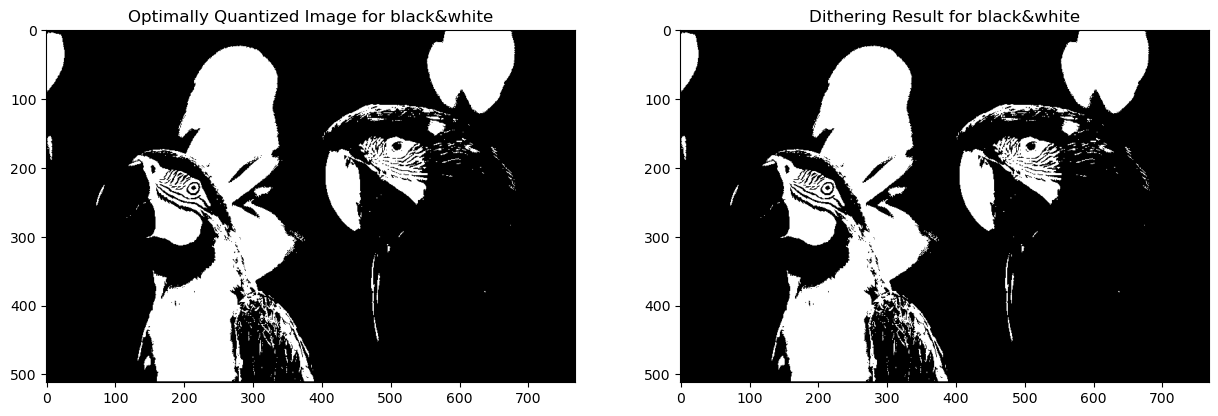

In [54]:
# Show quantized image (optimally quantized)
plt.subplot(121)
plt.imshow(quantized.astype(np.uint8))  # Convert to uint8 for display
plt.title('Optimally Quantized Image for black&white')

# Show dithering result
plt.subplot(122)
plt.imshow(dithering.astype(np.uint8))  # Convert to uint8 for display
plt.title('Dithering Result for black&white')

plt.show()

In [69]:
from sklearn.cluster import KMeans
n_clusters=16
kmeans = KMeans(n_clusters).fit(np.reshape(img, (-1, 1)))
colors = kmeans.cluster_centers_

In [70]:
# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]

        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        distances = np.sum((colors - pixel) ** 2, axis=1)
        closest_index = np.argmin(distances)
        new_pixel = colors[closest_index]
        
        # Apply quantization
        quantized[r, c, :] = new_pixel

In [71]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)
img_tmp = img_tmp.astype(float)
dithering = dithering.astype(float)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img[r, c, :]

        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        distances = np.sum((colors - pixel) ** 2, axis=1)
        closest_index = np.argmin(distances)
        new_pixel = colors[closest_index]

        # Compute quantization error
        quant_error = pixel - quantized[r, c, :]

        # Diffuse the quantization error according to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r, c+1, :] += quant_error * 7 / 16  # Diffuse to the pixel on the right
        img_tmp[r+1, c-1, :] += quant_error * 3 / 16  # Diffuse to the pixel on the bottom-left
        img_tmp[r+1, c, :] += quant_error * 5 / 16  # Diffuse to the pixel below
        img_tmp[r+1, c+1, :] += quant_error * 1 / 16 # Diffuse to the pixel on the bottom-right

        # Apply dithering
        dithering[r, c, :] = new_pixel

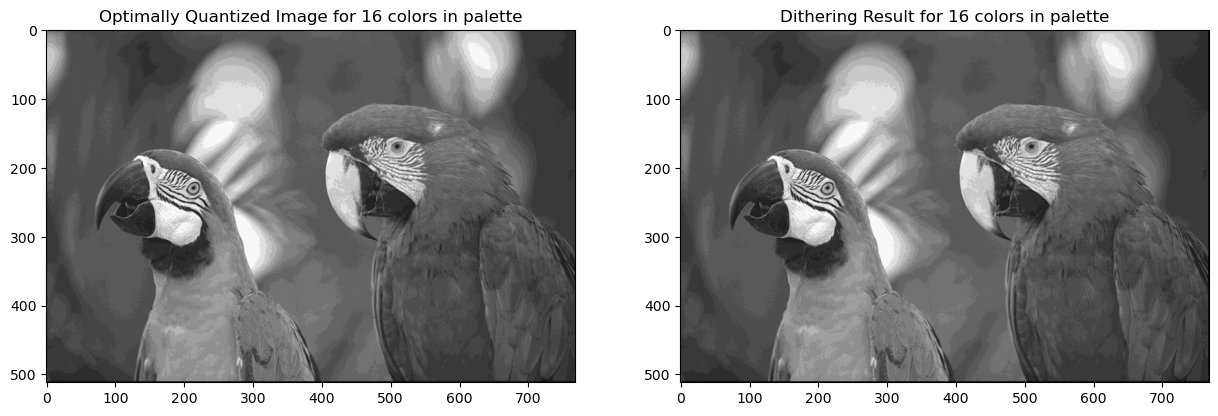

In [72]:
# Show quantized image (optimally quantized)
plt.subplot(121)
plt.imshow(quantized.astype(np.uint8))  # Convert to uint8 for display
plt.title('Optimally Quantized Image for 16 colors in palette')

# Show dithering result
plt.subplot(122)
plt.imshow(dithering.astype(np.uint8))  # Convert to uint8 for display
plt.title('Dithering Result for 16 colors in palette')

plt.show()

In [34]:
from sklearn.cluster import KMeans
n_clusters=32
kmeans = KMeans(n_clusters).fit(np.reshape(img, (-1, 1)))
colors = kmeans.cluster_centers_

In [35]:
# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]

        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        distances = np.sum((colors - pixel) ** 2, axis=1)
        closest_index = np.argmin(distances)
        new_pixel = colors[closest_index]
        
        # Apply quantization
        quantized[r, c, :] = new_pixel

In [36]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)
img_tmp = img_tmp.astype(float)
dithering = dithering.astype(float)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img[r, c, :]

        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        distances = np.sum((colors - pixel) ** 2, axis=1)
        closest_index = np.argmin(distances)
        new_pixel = colors[closest_index]

        # Compute quantization error
        quant_error = pixel - quantized[r, c, :]

        # Diffuse the quantization error according to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r, c+1, :] += quant_error * 7 / 16  # Diffuse to the pixel on the right
        img_tmp[r+1, c-1, :] += quant_error * 3 / 16  # Diffuse to the pixel on the bottom-left
        img_tmp[r+1, c, :] += quant_error * 5 / 16  # Diffuse to the pixel below
        img_tmp[r+1, c+1, :] += quant_error * 1 / 16 # Diffuse to the pixel on the bottom-right

        # Apply dithering
        dithering[r, c, :] = new_pixel

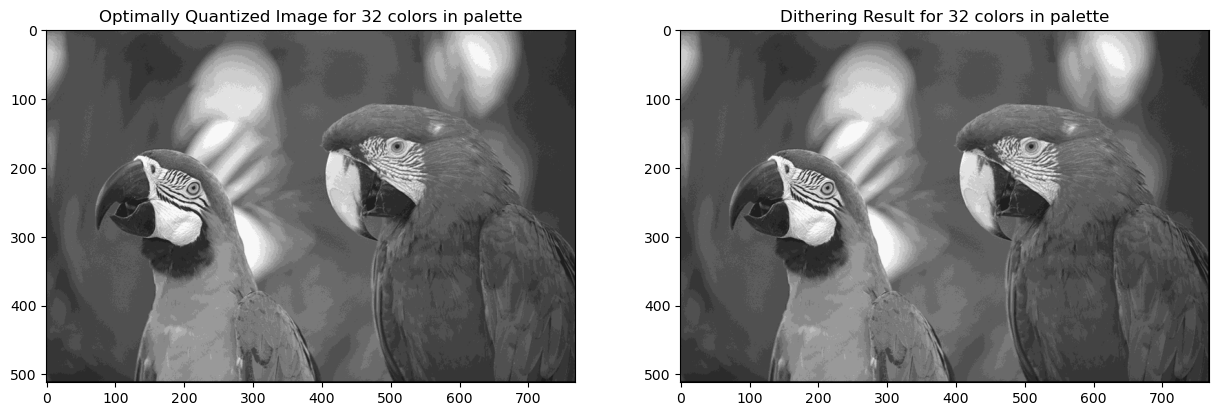

In [60]:
# Show quantized image (optimally quantized)
plt.subplot(121)
plt.imshow(quantized.astype(np.uint8))  # Convert to uint8 for display
plt.title('Optimally Quantized Image for 32 colors in palette')

# Show dithering result
plt.subplot(122)
plt.imshow(dithering.astype(np.uint8))  # Convert to uint8 for display
plt.title('Dithering Result for 32 colors in palette')

plt.show()

In [61]:
from sklearn.cluster import KMeans
n_clusters=256
kmeans = KMeans(n_clusters).fit(np.reshape(img, (-1, 1)))
colors = kmeans.cluster_centers_

In [62]:
# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]

        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        distances = np.sum((colors - pixel) ** 2, axis=1)
        closest_index = np.argmin(distances)
        new_pixel = colors[closest_index]
        
        # Apply quantization
        quantized[r, c, :] = new_pixel

In [63]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)
img_tmp = img_tmp.astype(float)
dithering = dithering.astype(float)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img[r, c, :]

        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        distances = np.sum((colors - pixel) ** 2, axis=1)
        closest_index = np.argmin(distances)
        new_pixel = colors[closest_index]

        # Compute quantization error
        quant_error = pixel - quantized[r, c, :]

        # Diffuse the quantization error according to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r, c+1, :] += quant_error * 7 / 16  # Diffuse to the pixel on the right
        img_tmp[r+1, c-1, :] += quant_error * 3 / 16  # Diffuse to the pixel on the bottom-left
        img_tmp[r+1, c, :] += quant_error * 5 / 16  # Diffuse to the pixel below
        img_tmp[r+1, c+1, :] += quant_error * 1 / 16 # Diffuse to the pixel on the bottom-right

        # Apply dithering
        dithering[r, c, :] = new_pixel

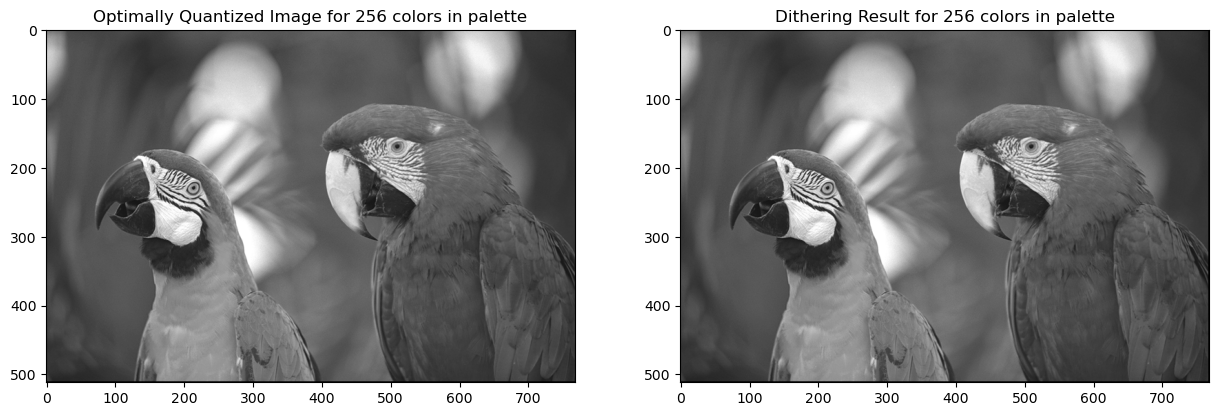

In [64]:
# Show quantized image (optimally quantized)
plt.subplot(121)
plt.imshow(quantized.astype(np.uint8))  # Convert to uint8 for display
plt.title('Optimally Quantized Image for 256 colors in palette')

# Show dithering result
plt.subplot(122)
plt.imshow(dithering.astype(np.uint8))  # Convert to uint8 for display
plt.title('Dithering Result for 256 colors in palette')

plt.show()